In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [13]:
print(df.shape)
print(df.columns)


(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#Data Cleaning & Preparation
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [16]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
#Label Encoder Gender
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
#One Hot Encoding
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [20]:
#Define Features and Labels, Split Dataset
from sklearn.model_selection import train_test_split
X=df.drop('Exited',axis=1)
Y=df['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [22]:
#Train a Classification Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [26]:
#Evaluate the Model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Y_pred=model.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Classification_report: ",classification_report(Y_test,Y_pred))
print("Confusion_matrix: ",confusion_matrix(Y_test,Y_pred))

Accuracy:  0.866
Classification_report:                precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion_matrix:  [[1552   55]
 [ 213  180]]


In [29]:
#Feature Importance Analysis
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances=feature_importances.sort_values(ascending=False)



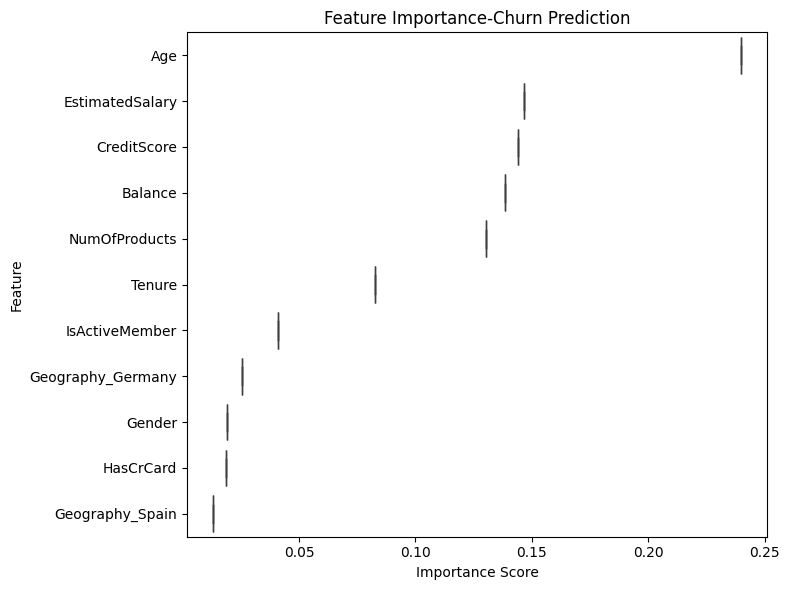

In [32]:
#Plot
plt.figure(figsize=(8,6))
sns.boxplot(x=feature_importances.values,y=feature_importances.index)
plt.title("Feature Importance-Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()